# Plotting 2 Sensors
---
<!-- Examples of 5 minute videos. Feel free to choose your own.
1. RELAXED: https://www.youtube.com/watch?v=i50ZAs7v9es
2. SCARY: https://www.youtube.com/watch?v=UY_9dJBM388
3. SAD: https://www.youtube.com/watch?v=jgTDK34mka8
4. FUNNY: https://www.youtube.com/watch?v=qc9e9o0YLS4
5. EXCITING: https://www.youtube.com/watch?v=hTWKbfoikeg -->

In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
path = 'datasets/'

In [34]:
with open(path+'neck_and_back_earlob.txt') as f:
    contents = f.readlines()
    f.close()

In [35]:
# length in minutes at sampling rate 1000 Hz
print("Minutes:", ((len(contents)-3)/1000)/60)

Minutes: 19.08


In [36]:
# printing labels and first lines
for line in contents[:3]:
    print(line)

# OpenSignals Text File Format. Version 1

# {"98:D3:11:FD:1F:39": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:11:FD:1F:39", "device connection": "/dev/tty.BITalino-1F-39-DevB", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10, 10], "firmware version": 1281, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2022-2-14", "time": "10:7:8.894", "channels": [1, 2], "sensor": ["PULSEOXI", "EDABITREV"], "label": ["A1", "A2"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2"], "special": [{}, {}], "digital IO": [0, 0, 1, 1]}}

# EndOfHeader



In [37]:
# create empty lists for ecg and eda
pul_array = []
eda_array = []

In [38]:
# how each row string look like
contents[5]

'2\t0\t0\t0\t0\t592\t22\t\n'

In [39]:
# splitting and getting data
for line in contents[3:]:
    
    list_line = line.split("\t")
    
    pul_array.append(int(list_line[5]))
    eda_array.append(int(list_line[6]))

In [40]:
# plot them over time
pul_np = np.array(pul_array)
eda_np = np.array(eda_array)
sensors = [pul_np, eda_np]

In [41]:
sensors[0]

array([593, 592, 592, ..., 523, 525, 527])

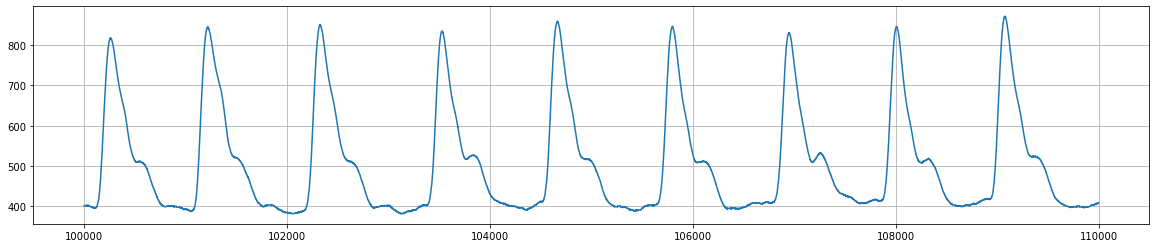

In [42]:
plt.figure(figsize=(20,4))
plt.plot(np.array(range(0,len(pul_np)))[10**5:(10**5)+(10**4)], pul_np[10**5:(10**5)+(10**4)])
plt.grid(True)

plt.show()

In [43]:
def moving_average(x,w):
    return np.convolve(x,np.ones(w),'valid') / w

In [44]:
smooth_pul = moving_average(sensors[0], 200)

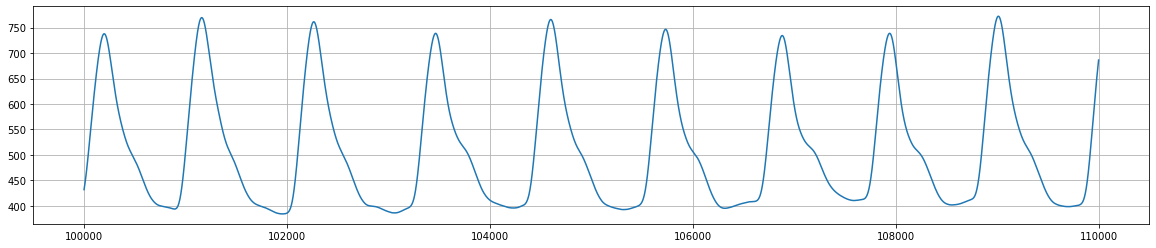

In [45]:
plt.figure(figsize=(20,4))
plt.plot(np.array(range(0,len(smooth_pul)))[10**5:(10**5)+(10**4)], smooth_pul[10**5:(10**5)+(10**4)])
plt.grid(True)

plt.show()

In [46]:
# index to add xtickers
first = len(pul_np)//5
print(first)

228960


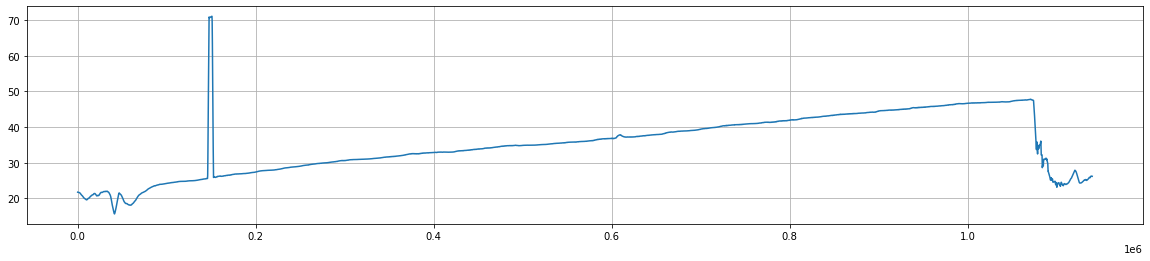

In [55]:
# Plot smooth EDA neck

smooth_eda = moving_average(eda_np, 5000)

plt.figure(figsize=(20,4))
plt.plot(np.array(range(0,len(smooth_eda))), smooth_eda)
plt.grid(True)

plt.show()

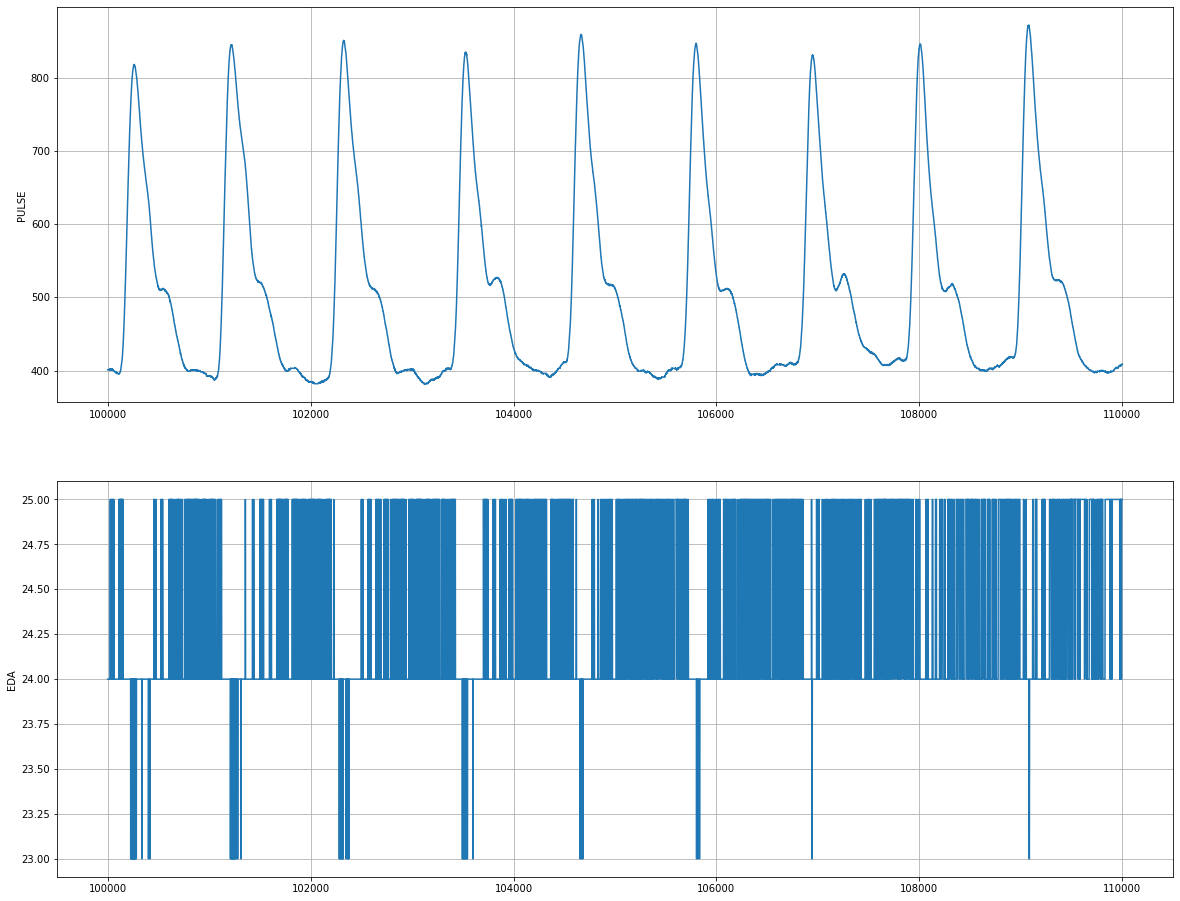

In [50]:
plt.figure(figsize=(20,16))

for i, name in enumerate(["PULSE", "EDA"]):
    plt.subplot(2, 1, i+1)
    plt.plot(np.array(range(0,len(sensors[i])))[10**5:(10**5)+(10**4)], sensors[i][10**5:(10**5)+(10**4)])
    plt.grid(True)
    plt.ylabel(name)

plt.show()